# Aim of The Project
The aim of the project is to predict weather phenomena with multiple linear regression model. We are particularly interested in predicting the average temperatures. The predictions should be based on values such as rainfall, amount of UV, max and min temperatures. We found a good dataset containing weather data from airport in Perth, Australia. The dataset contains data from 1944 till 2016. With this dataset we set out to implement our models as best as we could.


# Evaluation of Tutorial Used For Learning
Before starting working on our own model. We decided to go through some tutorials and learn about linear regression. We found multiple good tutorials on the subject but after brief discussion we decided on one tutorial that we would do as a group. [The tutorial we used](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f) taught us how to build a linear regression models with scikit-learn python library. The tutorial was divided in two parts: simple linear regression and multiple linear regression. Since our models was going to rely on multiple variables the second part was more useful for us. But the first part of the tutorial was also very helpful with examples of how matplotlib and pandas libraries work.

In general the tutorial was of high quality and we can recommend it for everyone who is interested in building their own linear regression models or just are interested in learning about machine learning and the libraries used for machine learning in Python


In [16]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# Analysis process
After we were decided on what dataset to use and what to predict with it we started by making a git repository and a common development environment. Our development environment is jupyter notebook running inside a conda virtual environment. This way it was easy for us to install and manage the libraries we wanted to use.

The actual process for the analysis started by looking at our dataset and figuring out what to use it for. The nature of the data being about weather we wanted to try to predict the daily average temperature based on other attributes such as the amount of UV radiation, rainfall and taking into consideration the time of the year.
With our goal set out in our minds we started preparing the data for our multiple linear regression model. By preparing the data we made sure that the dataset did not contain any bad values and our end result wouldn't be affected by them. Our method of cleaning up the data from these bad values meant dropping them from the dataset. Luckily there weren't many of such values.

With our cleaned up data we were ready to make training and testing datasets. Before making the datasets we had to decide what variables to use in our model. For our purposes these variables were rainfall, uv radiation and max temperature. We used these variables to predict daily average temperature. Our datasets were split into 80% training data and 20% testing data. The training data was used for creating our multiple linear regression model and training it. As for the testing data it was used for testing the model.

Once we had our datasets ready. The training datasets were fitted into a regression model. The model training method took the variables that know as their own dataset and the variable we want to predict as a seperate dataset. The model training function, in a nutshell, found us the best available line from the mess of datapoints and from that line we can make our predictions. With this method we got ourselves some coeffients that tells us how the variables affect the value we are trying to predict, in this case the daily average temperature. Now with our very own model we tried to predict some values with the testing dataset. We made our predictions and compared them to the testing dataset. By comparing them against each other we were able to determine how good our predictions were.

# Describing the dataset

The original dataset being used is a CSV file, wa_weather_1944_till_2016.csv. We use the pandas library to read
the contents of the file with read_csv() function.

In [17]:
dataset = pd.read_csv('wa_weather_1944_till_2016.csv')

### Shape

We use shape on the dataset to return the amount of columns and rows. The dataset contains 26543 rows and 9 columns, that are: year, month, day, rainfall amount in mm, the min and max temperatures in celcius, the daily average temperature, the daily temperature range and finally the amount of ultraviolet light. 

In [18]:
dataset.shape

(26543, 9)

### Describe

The describe function gives an overview of our dataset and gives a detailed description of the differenct values of the dataset attributes, i.e. the total amount, mean, min and max values.
* Year - Year of the measurement,
* Month - Month of the measurement,
* Day - Day of the measurement,
* Rainfall - Amount of rain,
* Min. temperature - Minimum temperature that day,
* Max. Temperature - Maximum temperature that dat,
* Daily avg. - Average temperature that day,
* Daily range - Daily range of temperature that dat,
* UV/MJ m*m - amount of UV radiation that day

In [19]:
dataset.describe()

,Year,Month,Day,rainfall_mm,min_temp_C,max_temp_C,daily_avg,daily_range,uv_MJ_m*m
count,26543.000000,26543.000000,26543.000000,26543.000000,26435.000000,26480.000000,26543.000000,26543.000000,9390.000000
mean,1980.164111,6.541160,15.730437,2.101281,12.104358,24.451828,18.224449,12.338684,18.967348
std,20.979310,3.445064,8.800655,5.851269,4.736770,6.287806,5.203848,4.390402,8.726202
min,1944.000000,1.000000,1.000000,0.000000,-1.300000,9.400000,0.000000,-20.600000,0.200000
25%,1962.000000,4.000000,8.000000,0.000000,8.700000,19.400000,14.250000,9.200000,11.600000
50%,1980.000000,7.000000,16.000000,0.000000,11.800000,23.200000,17.300000,12.400000,17.900000
75%,1998.000000,10.000000,23.000000,0.600000,15.400000,28.800000,21.900000,15.300000,26.900000
max,2016.000000,12.000000,31.000000,132.000000,28.700000,46.700000,36.800000,43.500000,37.100000


# Preparing the dataset

We check if the dataset contains any null values and remove them using isnull().any() to return a boolean value and dropna() to drop the null values from dataset.

In [20]:
dataset.isnull().any()

Year           False
Month          False
Day            False
rainfall_mm    False
min_temp_C      True
max_temp_C      True
daily_avg      False
daily_range    False
uv_MJ_m*m       True
dtype: bool

In [21]:
dataset = dataset.dropna()

# Drawing the dataset

We draw a graph of the daily average from the data. Y-axis is the probability density, X-axis is the average temperature.

Text(0, 0.5, 'Probability Density')

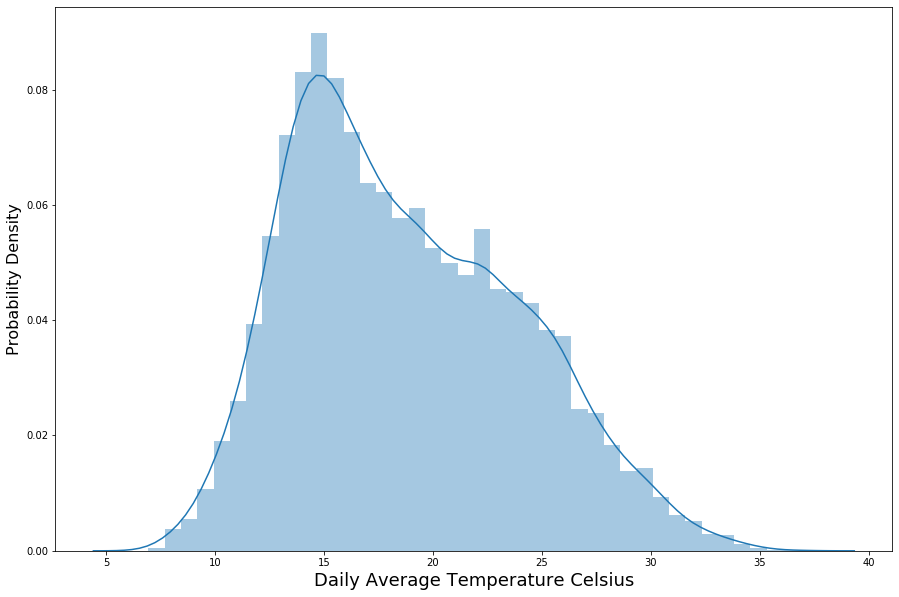

In [22]:
X = dataset[['max_temp_C', 'rainfall_mm', 'uv_MJ_m*m']]
y = dataset['daily_avg']

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['daily_avg'])
plt.xlabel('Daily Average Temperature Celsius', fontsize=18)
plt.ylabel('Probability Density', fontsize=16)

# Splitting dataset

We split the data set 80/20, and use the first 80% of the data to train our model, and the latter 20% to test the accuracy.
   

In [23]:
# Split 80% of data to train and 20% to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Coefficients
Coefficients tell the direction of the relation ship between the value we are trying to predict and the value that we gave as input to the model. A positive coefficient is a sign of the predicted value rising along side with the input parameter and vice versa.

In [25]:
# Most optimal coefficients for attributes
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
max_temp_C,0.873265
rainfall_mm,0.078061
uv_MJ_m*m,-0.064201


# Testing accuracy

We will use our test data and see how accurately our algorithm predicts the percentage score

In [26]:
y_pred = regressor.predict(X_test)

In [27]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head()
df1

,Actual,Predicted
25929,20.00,19.684492
24362,28.30,28.327448
17820,21.45,19.909388
22097,17.60,15.002273
24724,24.55,24.397757


# Metrics

In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.2332242903669715
Mean Squared Error: 2.3383053195271275
Root Mean Squared Error: 1.5291518301094655


# Evaluation of results

The algorithm predicted the results of the test data fairly accurately. A comparison can be seen in the table below which shows the actual values of the test data in left column and the predicted values in the other. As can be seen, the predicted values fall into range of the actual dataset test values.

### Algorithm performance

To get a better evaluation of the results we use evaluation metrics to determine the accuracy of the algorithm. The python Scikit-Learn library is used to calculate the root mean squared error, that is the square root of the mean of the squared errors. The calculation gives a result of 1.52 and comparing it to the daily_avg mean gives us a percentage.

(1.52 / 18.22) * 100 = 8%

This is a good enough value to get a fairly accurate prediction on the daily average temperature. 